## Procesamiento de Imágenes - Diplodatos 2022

Trabajo Práctico

In [1]:
integrantes = ["PABLO NICOLAS RAMOS"]
print(*integrantes, sep="\n")

PABLO NICOLAS RAMOS


Importar las librerías necesarias

In [2]:
import os
import imageio
import scipy as sp
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


from scipy import ndimage


%matplotlib inline

Abrir imágenes de demo incluídas en la biblioteca. Para evitar cargar desde disco, pueden utilizar estas imágenes para resolver el TP. Si utilizan otras adjuntarlas en la entrega para reproducibilidad.

C:\Users\pablonicolasr\AppData\Local\Temp\ipykernel_14044\677617377.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_rgb = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg"))


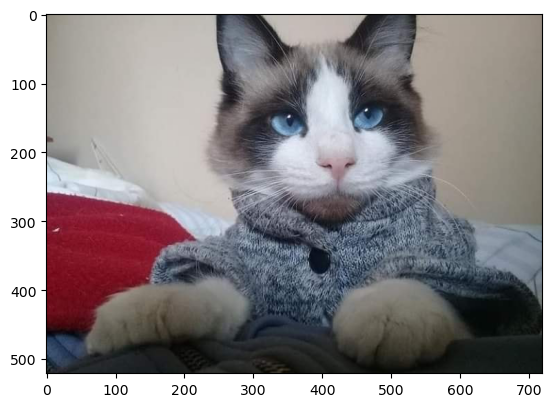

In [3]:
img_rgb = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg"))

plt.imshow(img_rgb)

# Otras imágenes (extraído de la documentación de imageio)

# bricks.jpg: A (repeatable) texture of stone bricks
# wood.jpg: A (repeatable) texture of wooden planks
# astronaut.png: Image of the astronaut Eileen Collins
# camera.png: A grayscale image of a photographer
# checkerboard.png: Black and white image of a chekerboard
# chelsea.png: Image of Stefan’s cat
# clock.png: Photo of a clock with motion blur (Stefan van der Walt)
# coffee.png: Image of a cup of coffee (Rachel Michetti)
# coins.png: Image showing greek coins from Pompeii
# horse.png: Image showing the silhouette of a horse (Andreas Preuss)
# hubble_deep_field.png: Photograph taken by Hubble telescope (NASA)
# immunohistochemistry.png: Immunohistochemical (IHC) staining
# moon.png: Image showing a portion of the surface of the moon
# page.png: A scanned page of text
# text.png: A photograph of handdrawn text
# wikkie.png: Image of Almar’s cat

# Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

In [4]:
# Se define una clase con todos los métodos solicitados en el ejercicio 1.1

class ImageOperation:
    
    def __init__(self):
        
        self.yiq_from_rgb = np.array(
            [
                [0.299, 0.587, 0.114], 
                [0.59590059, -0.27455667, -0.32134392], 
                [0.21153661, -0.52273617, 0.31119955]
            ]
        )
        
        self.rgb_from_yiq = np.array(
            [
                [1, 0.9663, 0.6210], 
                [1, -0.2721, -0.6474], 
                [1, -0.1070, 1.7046]
            ]
        )
        
        self.alpha = 2.2
        
        self.beta = 0.77
        
        
    def RGBtoYIQ(self, img_rgb):
        
        """
        Converts an RGB image to YIQ color space
        :param imgRGB: An Image in RGB
        :return: A YIQ in image color space
        """
        
        initShape = img_rgb.shape       
        
        
        return np.dot(img_rgb.reshape(-1,3), self.yiq_from_rgb.transpose()).reshape(initShape)
    
    def clamping(self, arrayChannel):
        
        arrayChannel = np.clip(arrayChannel, np.min(arrayChannel), 1)
        
        return arrayChannel
    
    def rangeI(self, ci):
        
        ci = np.clip(ci, -0.5957, 0.5957)
        
        return ci
    
    def rangeQ(self, cq):
        
        cq = np.clip(cq, -0.5226, 0.5226)
        
        return cq   
        
    def multiplyByFactor(self, img_rgb):
        
        img_yiq = self.RGBtoYIQ(img_rgb)
        
        initShape = img_yiq.shape
        
        img_yiq_sep = img_yiq.reshape(-1,3)
        
        y = self.clamping(img_yiq_sep[:, 0] * self.alpha)
        
        i = self.rangeI(img_yiq_sep[:, 1] * self.beta)
        
        q = self.rangeQ(img_yiq_sep[:, 2] * self.beta)
        
        img_yiq = np.stack((y, i, q), axis = 1)
        
        return img_yiq.reshape(initShape)
    
    def YIQtoRGB(self, img_rgb):
        
        """
        Converts an RGB image to YIQ color space
        :param imgRGB: An Image in RGB
        :return: A YIQ in image color space
        """
        
        img_yiq = self.multiplyByFactor(img_rgb)
        
        initShape = img_yiq.shape   
        
        return np.dot(img_yiq.reshape(-1,3), self.rgb_from_yiq.transpose()).reshape(initShape)
    
    def truncRGB(self, img_rgb):
        
        imgRgb = self.YIQtoRGB(img_rgb)
        
        return np.clip(imgRgb, 0, 1)      

In [5]:
img_rgb = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg")) / 255

img = ImageOperation()

C:\Users\pablonicolasr\AppData\Local\Temp\ipykernel_14044\2625284247.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_rgb = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg")) / 255


Text(0.5, 1.0, 'PUNTO A')

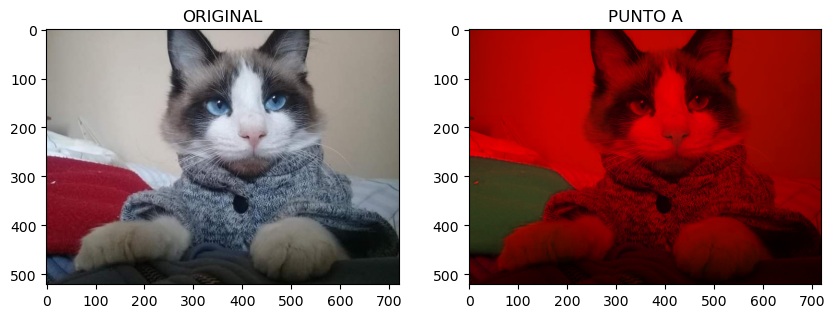

In [6]:
rgbToYiq = img.RGBtoYIQ(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title("ORIGINAL")
axes[1].imshow(np.clip(rgbToYiq, 0, 1))
axes[1].set_title("PUNTO A")

Text(0.5, 1.0, 'PUNTO B')

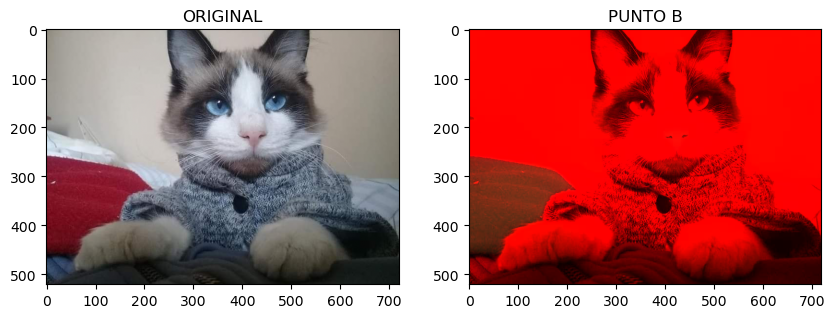

In [7]:
yiqMult = img.multiplyByFactor(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title("ORIGINAL")
axes[1].imshow(np.clip(yiqMult, 0, 1))
axes[1].set_title("PUNTO B")

Text(0.5, 1.0, 'PUNTO C')

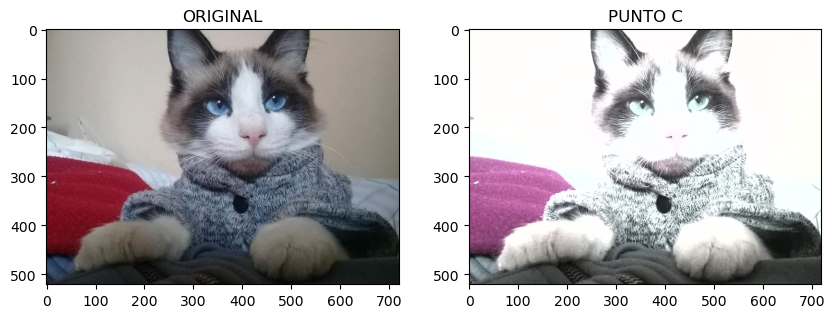

In [8]:
yiqRgb = img.YIQtoRGB(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title("ORIGINAL")
axes[1].imshow(np.clip(yiqRgb, 0, 1))
axes[1].set_title("PUNTO C")

Text(0.5, 1.0, 'PUNTO D')

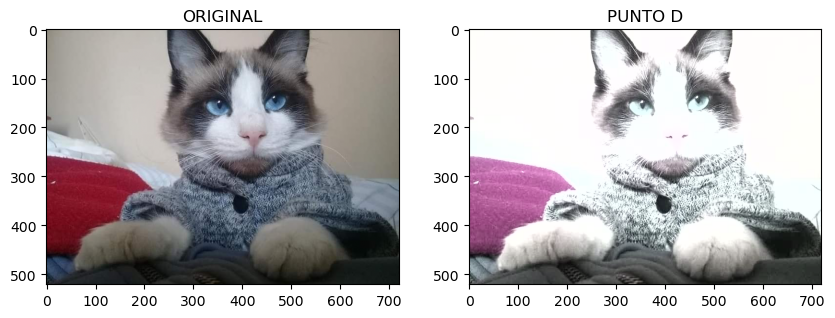

In [9]:
truncRGB = img.truncRGB(img_rgb)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title("ORIGINAL")
axes[1].imshow(np.clip(truncRGB, 0, 1))
axes[1].set_title("PUNTO D")

# Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

## \[Extra\] Graficar el conjunto de Mandelbrot con distintas paletas

Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

[Click aquí para descargar mandelbrot.npy](https://drive.google.com/file/d/1aBhCCUK-nqCPLqr5HPQDZGXb1uhjr1gz/view?usp=sharing)

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

<IPython.core.display.Javascript object>


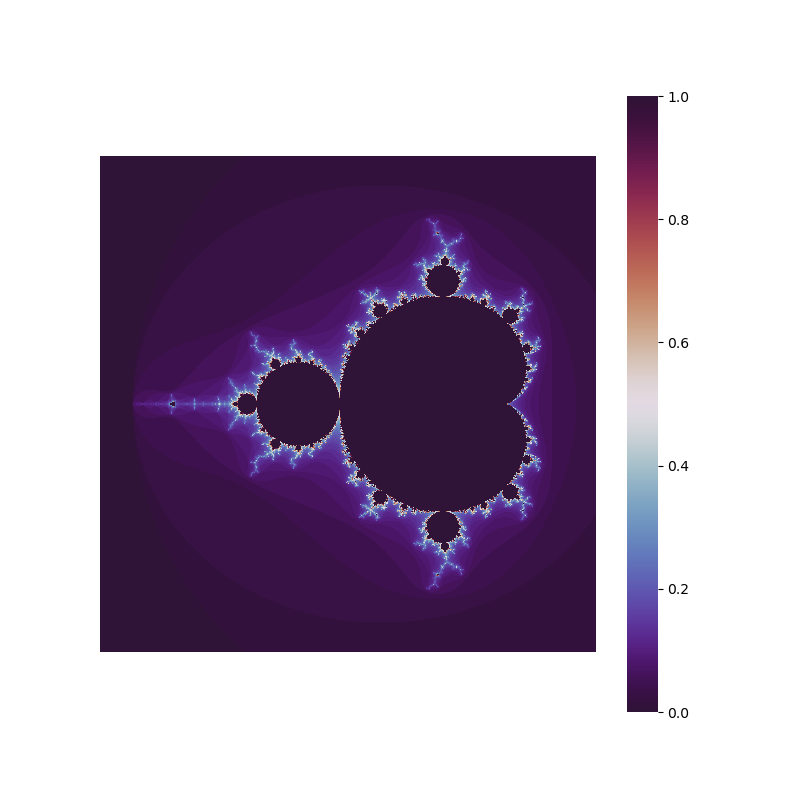

<AxesSubplot:>

In [10]:
import seaborn as sns
%matplotlib notebook

x = np.load("mandelbrot.npy", mmap_mode='r')

fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap="twilight_shifted", square=True, xticklabels=False, yticklabels=False)

<IPython.core.display.Javascript object>


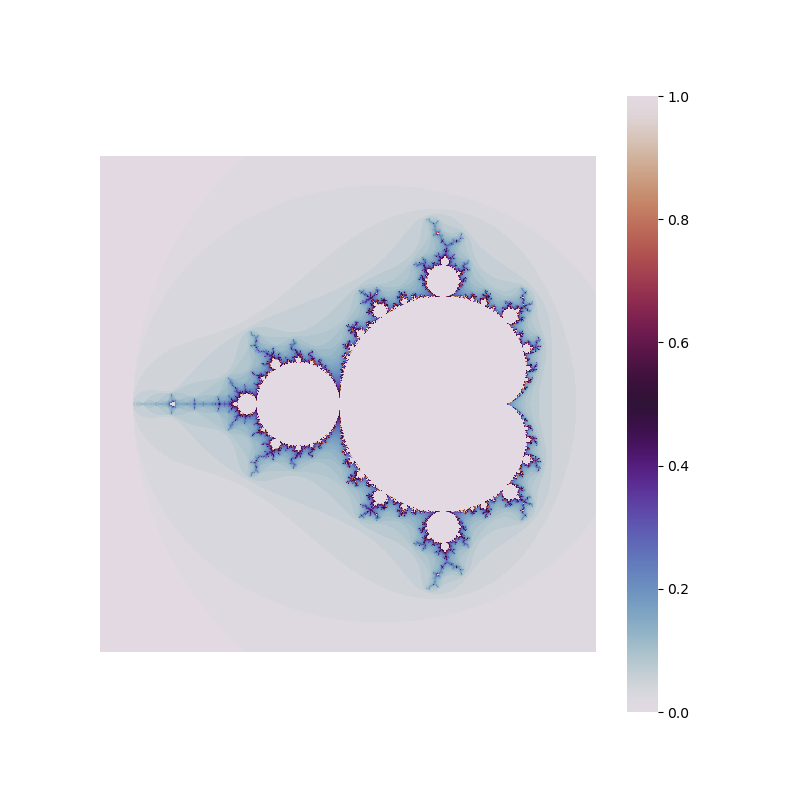

<AxesSubplot:>

In [11]:
y = np.load("mandelbrot.npy", mmap_mode='r')

fig = plt.figure(figsize=(8,8))

sns.heatmap(y, cmap="twilight", square=True, xticklabels=False, yticklabels=False)

<IPython.core.display.Javascript object>


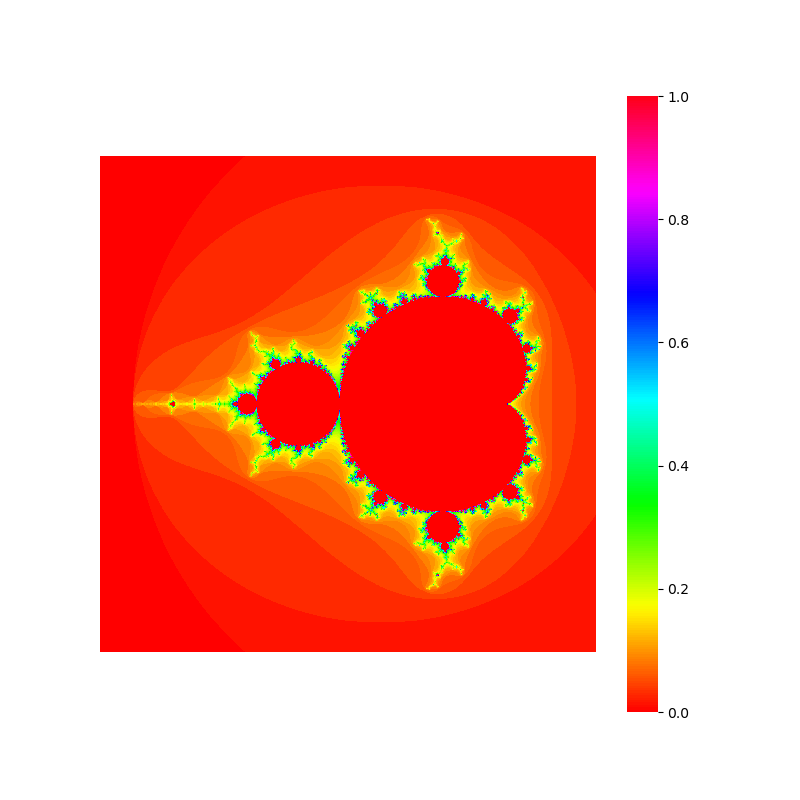

<AxesSubplot:>

In [12]:
z = np.load("mandelbrot.npy", mmap_mode='r')

fig = plt.figure(figsize=(8,8))

sns.heatmap(z, cmap="hsv", square=True, xticklabels=False, yticklabels=False)

# Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

In [13]:
class GreyScale:
    
    def __init__(self):        
        
        self.mGrey = np.ones((3,3))/3        
    
    def applyMatrix(self, img):
        
        return np.matmul(img.reshape((-1,3)), self.mGrey.T).reshape(img.shape)
    
    def greyConvert(self, img_rgb2):
        
        """
        Converts an RGB image to YIQ color space
        :param imgRGB: An Image in RGB
        :return: A YIQ in image color space
        """
        
        initShape = img_rgb2.shape   
        
        return self.applyMatrix(img_rgb2)        

In [14]:
img_rgb2 = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg")) / 255

img2 = GreyScale()

C:\Users\pablonicolasr\AppData\Local\Temp\ipykernel_14044\3662789105.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_rgb2 = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg")) / 255


<IPython.core.display.Javascript object>


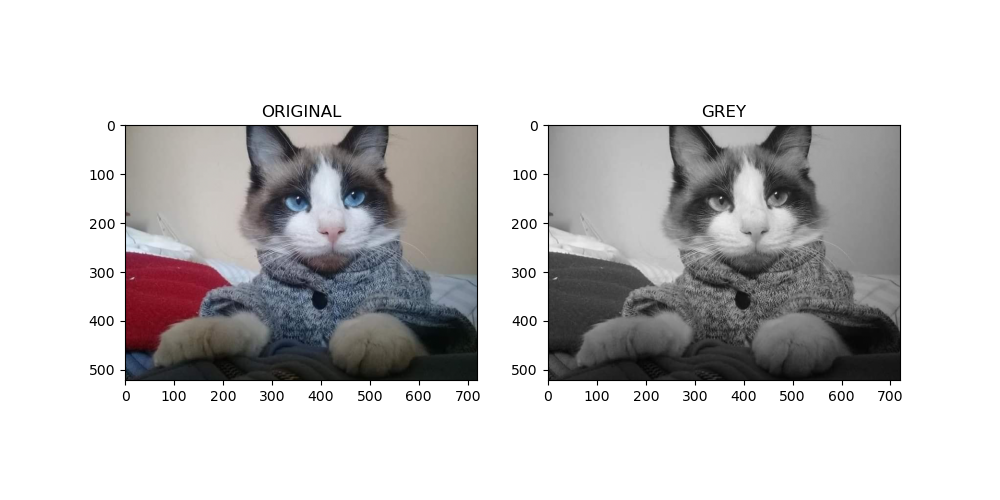

Text(0.5, 1.0, 'GREY')

In [15]:
imgGrey = img2.greyConvert(img_rgb2)

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(np.clip(img_rgb2, 0, 1))
axes[0].set_title("ORIGINAL")
axes[1].imshow(np.clip(imgGrey, 0, 1))
axes[1].set_title("GREY")

In [ ]:
class Convolution:
    
    def __init__(self):        
        
        pass
    
    def planeFilter(self):
        
        pass
    
    def barlettFilter(self):
        
        pass

    def gaussianFilter(self):
        
        pass  

In [ ]:
class EdgeDetector:
    
    def __init__(self):        
        
        pass
    
    def Laplaciano(self, bin_image, sigma_val, size_val):
        
        pass
    
    def Sobel(self, grey_img):
        
        # Sobel Operator
        h, w, d = grey_img.shape
        
        # define filters
        horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # s2
        vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # s1
        
        # define images with 0s
        newgradientImage = np.zeros((h, w, d))
        
        # offset by 1
        for channel in range(d):
            for i in range(1, h - 1):
                for j in range(1, w - 1):
                    horizontalGrad = (horizontal[0, 0] * grey_img[i - 1, j - 1, channel]) + \
                                     (horizontal[0, 1] * grey_img[i - 1, j, channel]) + \
                                     (horizontal[0, 2] * grey_img[i - 1, j + 1, channel]) + \
                                     (horizontal[1, 0] * grey_img[i, j - 1, channel]) + \
                                     (horizontal[1, 1] * grey_img[i, j, channel]) + \
                                     (horizontal[1, 2] * grey_img[i, j + 1, channel]) + \
                                     (horizontal[2, 0] * grey_img[i + 1, j - 1, channel]) + \
                                     (horizontal[2, 1] * grey_img[i + 1, j, channel]) + \
                                     (horizontal[2, 2] * grey_img[i + 1, j + 1, channel])

                    verticalGrad = (vertical[0, 0] * grey_img[i - 1, j - 1, channel]) + \
                                   (vertical[0, 1] * grey_img[i - 1, j, channel]) + \
                                   (vertical[0, 2] * grey_img[i - 1, j + 1, channel]) + \
                                   (vertical[1, 0] * grey_img[i, j - 1, channel]) + \
                                   (vertical[1, 1] * grey_img[i, j, channel]) + \
                                   (vertical[1, 2] * grey_img[i, j + 1, channel]) + \
                                   (vertical[2, 0] * grey_img[i + 1, j - 1, channel]) + \
                                   (vertical[2, 1] * grey_img[i + 1, j, channel]) + \
                                   (vertical[2, 2] * grey_img[i + 1, j + 1, channel])

                    # Edge Magnitude
                    mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
                    # Avoid underflow: clip result
                    newgradientImage[i - 1, j - 1, channel] = mag
        
        # now add the images r g and b
        rgb_edge = newgradientImage[:,:,0] + newgradientImage[:,:,1] + newgradientImage[:,:,2]
        
        plt.figure()
        plt.title("shely_sobel.png")
        plt.imsave("shely_sobel.png", rgb_edge, cmap="gray", format="png")
        plt.imshow(rgb_edge, cmap="gray")
        plt.show()  

In [ ]:
edge = EdgeDetector()

edge.Sobel(imgGrey)

# Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat
Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

In [16]:
class MorpOperation():
    
    def __init__(self):
        
        pass
    
    def rgb2gray(self, img_rgb):
        
        return np.dot(img_rgb[...,:3], [0.2989, 0.5870, 0.1140])
    
    def gray2binary(self, img_grey):
        
        return (127 < img_grey) & (img_grey <= 255)    
        
    def erosion(self, img, kernel):
        
        output = np.zeros_like(img)
        
        image_padded = np.zeros(
            (img.shape[0] + kernel.shape[0] - 1, img.shape[1] + kernel.shape[1] - 1)
        )

        # Copy image to padded image
        image_padded[kernel.shape[0] - 2 : -1 :, kernel.shape[1] - 2 : -1 :] = img

        # Iterate over image & apply kernel
        for x in range(img.shape[1]):
            for y in range(img.shape[0]):
                summation = (
                    kernel * image_padded[y : y + kernel.shape[0], x : x + kernel.shape[1]]
                ).sum()
                output[y, x] = int(summation == 5)
                
        return output
    
    def dilation(self, img, kernel):
    
        output = np.zeros_like(img)
        
        image_padded = np.zeros(
            (img.shape[0] + kernel.shape[0] - 1, img.shape[1] + kernel.shape[1] - 1)
        )

        # Copy image to padded image
        image_padded[kernel.shape[0] - 2 : -1 :, kernel.shape[1] - 2 : -1 :] = img

        # Iterate over image & apply kernel
        for x in range(img.shape[1]):
            for y in range(img.shape[0]):
                summation = (
                    kernel * image_padded[y : y + kernel.shape[0], x : x + kernel.shape[1]]
                ).sum()
                output[y, x] = int(summation > 0)
        return output
    
    def opening(self, img_rgb, structuring_element):
        
        erosion = self.erosion(self.gray2binary(self.rgb2gray(img_rgb)), structuring_element)
        
        pil_img = Image.fromarray(erosion).convert("RGB")
        
        pil_img.save("shely_et1.png")
        
        img = imageio.imread("shely_et1.png")
        
        os.remove("shely_et1.png")
        
        return self.dilation(self.gray2binary(self.rgb2gray(img)), structuring_element)
    
    def close(self, img_rgb, structuring_element):
        
        dilation = self.dilation(self.gray2binary(self.rgb2gray(img_rgb)), structuring_element)
        
        pil_img = Image.fromarray(dilation).convert("RGB")
        
        pil_img.save("shely_et2.png")
        
        img = imageio.imread("shely_et2.png")
        
        os.remove("shely_et2.png")
        
        return self.erosion(self.gray2binary(self.rgb2gray(img)), structuring_element)
    
    def median_filter(self, img_path):
        
        img = Image.open(img_path).convert("L")
        arr = np.array(img)
        
        data, filter_size = arr, 3
        
        temp = []
        indexer = filter_size // 2
        
        data_final = []
        data_final = np.zeros((len(data),len(data[0])))
        
        for i in range(len(data)):

            for j in range(len(data[0])):

                for z in range(filter_size):
                    if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                        for c in range(filter_size):
                            temp.append(0)
                    else:
                        if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                            temp.append(0)
                        else:
                            for k in range(filter_size):
                                temp.append(data[i + z - indexer][j + k - indexer])

                temp.sort()
                data_final[i][j] = temp[len(temp) // 2]
                temp = []
        return data_final

In [17]:
# kernel to be applied
structuring_element = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

img_rgb = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg"))

C:\Users\pablonicolasr\AppData\Local\Temp\ipykernel_14044\3492966491.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_rgb = imageio.imread(os.path.join(os.getcwd(), "shely720x521.jpg"))


<IPython.core.display.Javascript object>


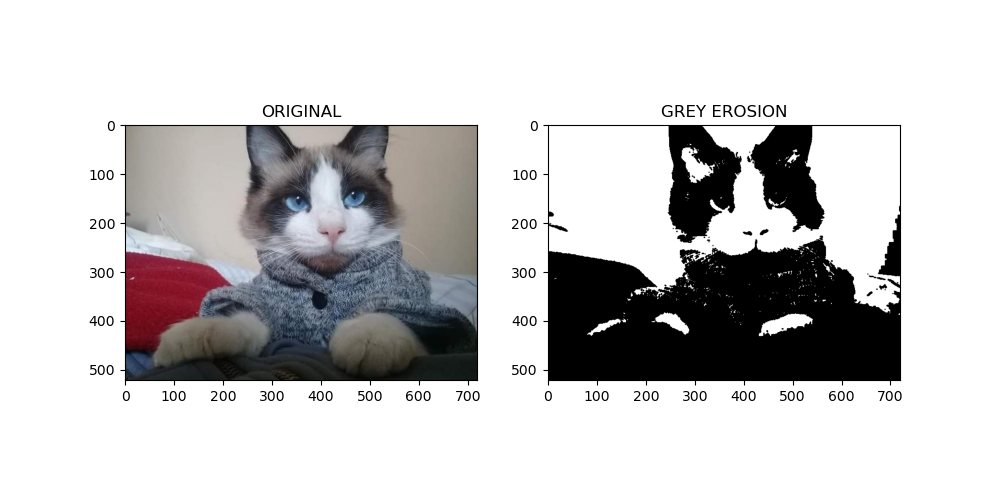

Text(0.5, 1.0, 'GREY EROSION')

In [18]:
# Apply erosion operation to a binary image
output = MorpOperation()

out = output.erosion(output.gray2binary(output.rgb2gray(img_rgb)), structuring_element)

# Save the output image
pil_img = Image.fromarray(out).convert("RGB")
pil_img.save(os.path.join(os.getcwd(), "images", "shely_erosion.png"))

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(img_rgb)
axes[0].set_title("ORIGINAL")
axes[1].imshow(pil_img)
axes[1].set_title("GREY EROSION")

<IPython.core.display.Javascript object>


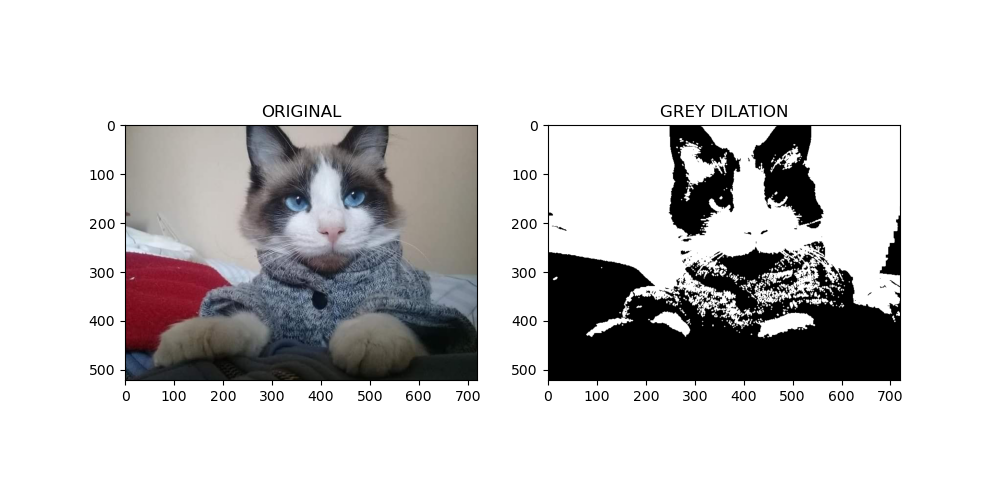

Text(0.5, 1.0, 'GREY DILATION')

In [19]:
out = output.dilation(output.gray2binary(output.rgb2gray(img_rgb)), structuring_element)

# Save the output image
pil_img = Image.fromarray(out).convert("RGB")
pil_img.save(os.path.join(os.getcwd(), "images", "shely_dilation.png"))

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(img_rgb)
axes[0].set_title("ORIGINAL")
axes[1].imshow(pil_img)
axes[1].set_title("GREY DILATION")

C:\Users\pablonicolasr\AppData\Local\Temp\ipykernel_14044\1324578575.py:64: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("shely_et1.png")


<IPython.core.display.Javascript object>


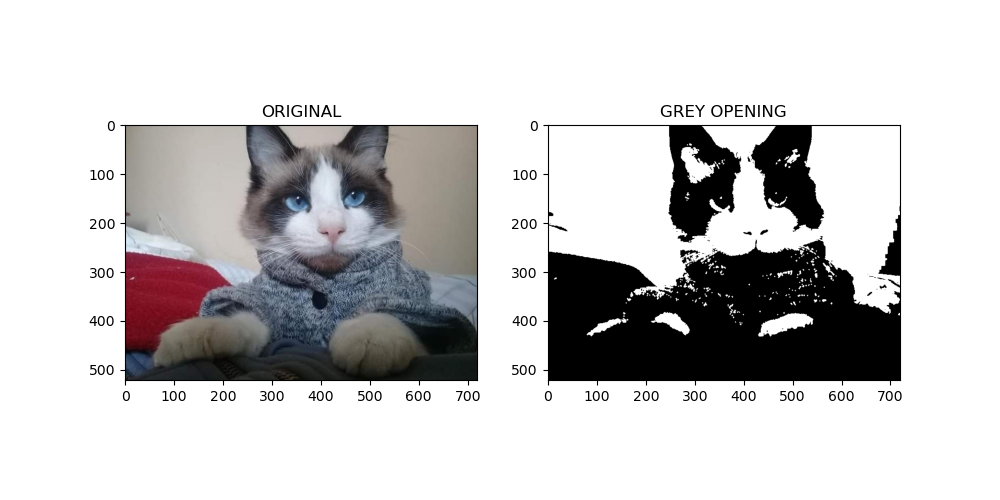

Text(0.5, 1.0, 'GREY OPENING')

In [20]:
out = output.opening(img_rgb, structuring_element)

# Save the output image
pil_img = Image.fromarray(out).convert("RGB")
pil_img.save(os.path.join(os.getcwd(), "images", "shely_opening.png"))

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(img_rgb)
axes[0].set_title("ORIGINAL")
axes[1].imshow(pil_img)
axes[1].set_title("GREY OPENING")

C:\Users\pablonicolasr\AppData\Local\Temp\ipykernel_14044\1324578575.py:78: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("shely_et2.png")


<IPython.core.display.Javascript object>


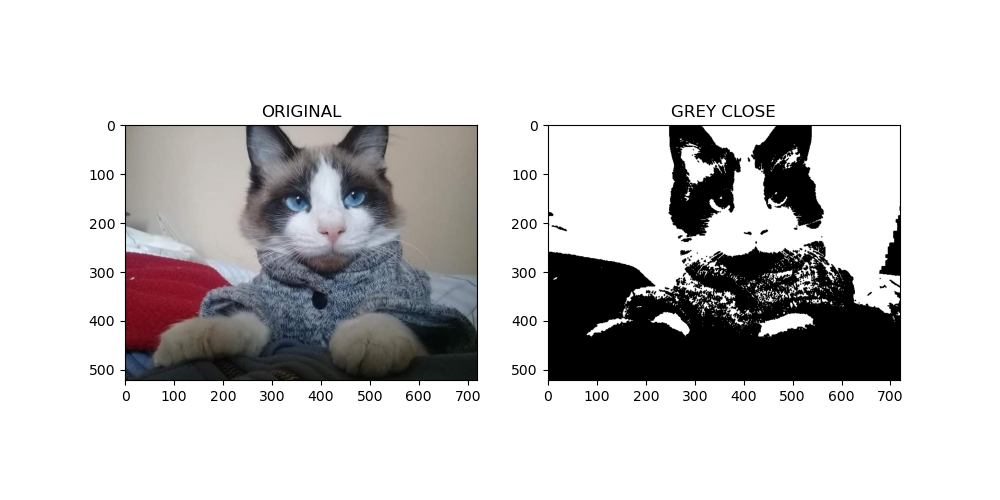

Text(0.5, 1.0, 'GREY CLOSE')

In [21]:
out = output.close(img_rgb, structuring_element)

# Save the output image
pil_img = Image.fromarray(out).convert("RGB")
pil_img.save(os.path.join(os.getcwd(), "images", "shely_close.png"))

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(img_rgb)
axes[0].set_title("ORIGINAL")
axes[1].imshow(pil_img)
axes[1].set_title("GREY CLOSE")

C:\Users\pablonicolasr\AppData\Local\Temp\ipykernel_14044\2552908495.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  init_image = imageio.imread(os.path.join(os.getcwd(), "noisyimg.png")) / 255


<IPython.core.display.Javascript object>


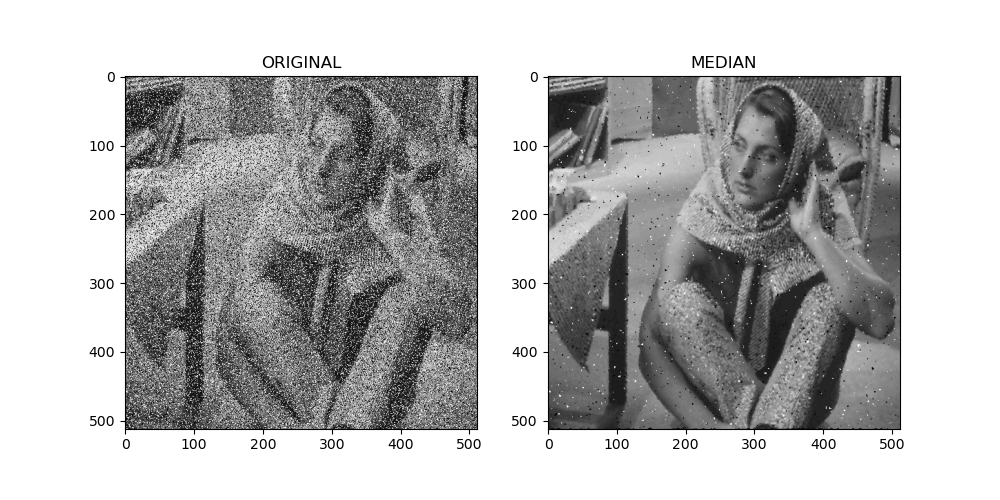

Text(0.5, 1.0, 'MEDIAN')

In [22]:
out = output.median_filter(os.path.join(os.getcwd(), "noisyimg.png"))

init_image = imageio.imread(os.path.join(os.getcwd(), "noisyimg.png")) / 255

# Save the output image
pil_img = Image.fromarray(out).convert("RGB")
pil_img.save(os.path.join(os.getcwd(), "images", "median.png"))

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].imshow(init_image, cmap="gray")
axes[0].set_title("ORIGINAL")
axes[1].imshow(pil_img, cmap="gray")
axes[1].set_title("MEDIAN")

# Ejercicios Optativos. Ver presentación para más detalle
Recordá que hay ejercicios opcionales especificados en la presentación correspondiente al trabajo práctico.